In [1]:
#FOR ANALYSIS/CLEANING/COMPUTATION:
import pandas as pd
import numpy as np

#FOR VISUALIZATION:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
import pandas as pd

print("Loading data file now, this could take a while depending on file size")
start = time.time()
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None) # ADD-CSV
end = time.time()
print("Loading took " + str(round(end - start, 2)) + " seconds")
missing_values = df.isna().sum().sum()
duplicated_values = df.duplicated().sum()
print(f'\nMissing values: {missing_values}')
print(f'Duplicated values: {duplicated_values}')
if missing_values >= 1:
    print('\nMissing values by column:')
    print(df.isna().sum())
print("\nUnique Values in Each Column:")
print(df.nunique())

Loading data file now, this could take a while depending on file size
Loading took 0.0 seconds

Missing values: 0
Duplicated values: 0

Unique Values in Each Column:
text         128
sentiment      2
dtype: int64


In [3]:
df['sentiment'].value_counts()

sentiment
neg    68
pos    60
Name: count, dtype: int64

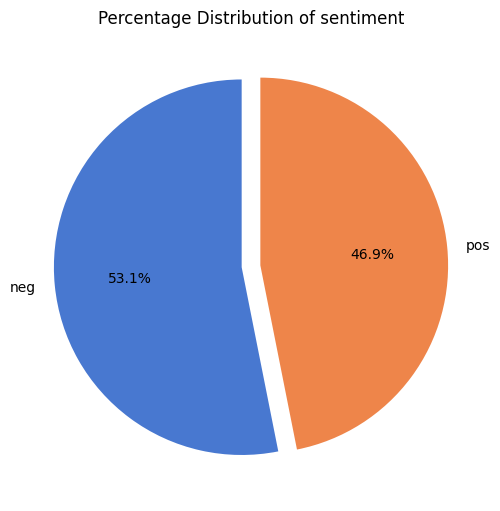

In [4]:
def plot_categorical_distributions(columns, data=df, palette='muted'):
    plt.figure(figsize=(15, 6))  
    
    for i, column_name in enumerate(columns):
        plt.subplot(1, 3, i + 1)  
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette
                            (palette), startangle=90, explode=[0.05] * value_counts.nunique())
        
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')  
    
    plt.tight_layout()
    plt.show()


columns_to_plot = ['sentiment']
plot_categorical_distributions(columns_to_plot)

In [5]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

In [6]:
import re
def clean_text(text):
    text = re.sub(r'Ã[\x80-\xBF]+', ' ', text)
    text = re.sub(r'[^a-zA-Zก-ฮะ-์\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text.lower()

In [7]:
from pythainlp import word_tokenize
def text_process(text):
    if pd.isna(text):
        return np.nan
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ",))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() 
                     if word.lower not in thai_stopwords)
    return final


In [8]:
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

In [9]:
df.head()

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...


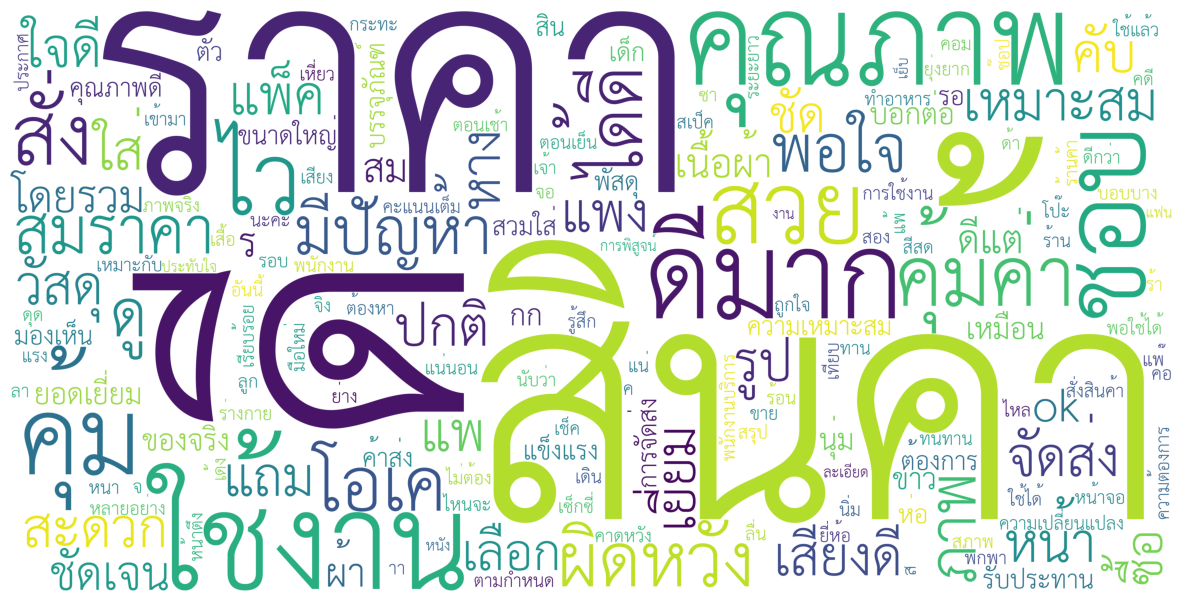

In [10]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

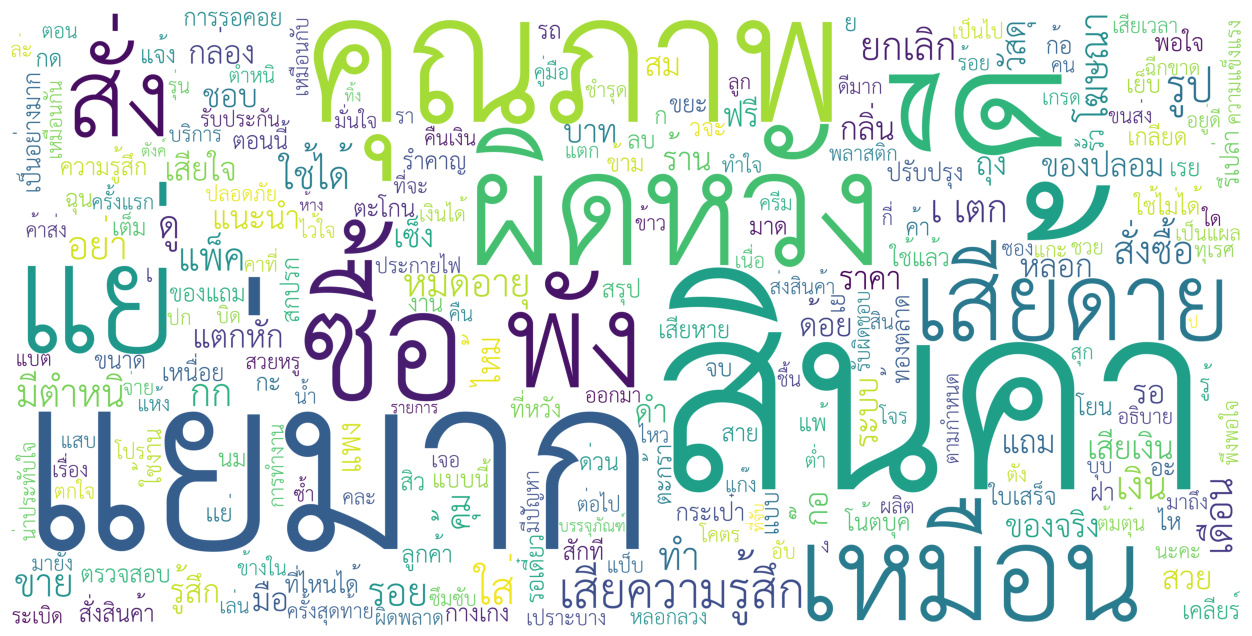

In [11]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = df[['text_tokens']]
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(analyzer=lambda x:x.split(' '))
cvec.fit_transform(X_train['text_tokens'])
cvec.vocabulary_

{'ส่ง': 251,
 'เร็ว': 303,
 'ทัน': 122,
 'ใช้': 361,
 'ตาม': 109,
 'ความต้องการ': 41,
 'สินค้า': 247,
 'มี': 183,
 'รอย': 197,
 'ตำหนิ': 111,
 'เป็น': 295,
 'ง่าย': 65,
 'ช้า': 83,
 'มาก': 181,
 'ตอนนี้': 103,
 'ยัง': 189,
 'ไม่': 374,
 'ได้': 370,
 'ของ': 28,
 'คุณภาพ': 54,
 'แย่มาก': 345,
 'ใช้งาน': 362,
 'แม้แต่': 343,
 'ครั้ง': 36,
 'เดียว': 287,
 'เปราะบาง': 294,
 'ความแข็งแรง': 44,
 'น้อย': 143,
 'มัน': 178,
 'ต่อ': 112,
 'การ': 12,
 'แตกหัก': 329,
 'สั่ง': 240,
 'จ่าย': 75,
 'เงิน': 281,
 'แต่': 330,
 'ได้รับ': 372,
 'กระทะ': 3,
 'ร้อน': 213,
 'ทำอาหาร': 125,
 'หลายอย่าง': 262,
 'เลย': 304,
 'ค่ะ': 60,
 'ชอบ': 78,
 'แนะนำ': 333,
 'ซื้อ': 86,
 'มา': 180,
 'ใช้ได้': 363,
 'วัน': 226,
 'ใช้ไม่ได้': 364,
 'แล้ว': 348,
 'ชำรุด': 81,
 'มาถึง': 182,
 'แกะ': 324,
 'ดู': 94,
 'แตก': 328,
 'ผ้า': 164,
 'นิ่ม': 138,
 'เด้ง': 290,
 'ดีกว่า': 90,
 'ที่': 127,
 'คิด': 51,
 'ไว้': 377,
 'คะ': 47,
 'รวดเร็ว': 193,
 'ใหม่': 368,
 'ด้วย': 96,
 'โดยรวม': 354,
 'ให้': 369,
 'คะแนนเต็ม': 48,
 'ครับ'

In [14]:
train_bow = cvec.transform(X_train['text_tokens'])
train_bow_df = pd.DataFrame(train_bow.toarray(), 
                            columns=cvec.get_feature_names_out(),
                            index=X_train['text_tokens'])

In [15]:
train_bow_df.head()

,ok,กก,กด,กระทะ,กระเป๋า,กลิ่น,กล่อง,กว่า,กะ,กัน,...,ได้ดี,ได้รับ,ไป,ไม่,ไม่ค่อย,ไว,ไว้,ไหนจะ,ไหม้,ไหล
text_tokens,,,,,,,,,,,,,,,,,,,,,
ส่ง เร็ว ทัน ใช้ ตาม ความต้องการ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
สินค้า มี รอย ตำหนิ เป็น รอย ง่าย,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ส่ง ช้า มาก ตอนนี้ ยัง ไม่ ได้ ของ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
คุณภาพ แย่มาก ใช้งาน ไม่ ได้ แม้แต่ ครั้ง เดียว,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ แตกหัก,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bow, y_train)

LogisticRegression()

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
test_bow = cvec.transform(X_test['text_tokens'])
test_predictions = lr.predict(test_bow)
print(classification_report(test_predictions, y_test))

              precision    recall  f1-score   support

         neg       1.00      0.79      0.88        24
         pos       0.75      1.00      0.86        15

    accuracy                           0.87        39
   macro avg       0.88      0.90      0.87        39
weighted avg       0.90      0.87      0.87        39



In [18]:
my_text = 'แมวเหี้ยจริงๆและดีมาก'
my_tokens = text_process(my_text)
my_bow = cvec.transform(pd.Series([my_tokens]))
my_predictions = lr.predict(my_bow)
print(my_predictions)

['neg']


In [19]:
df

,text,sentiment,text_tokens
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg,เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1,สินค้าด้อยคุณภาพ,neg,สินค้า ด้อย คุณภาพ
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ กดใส่ตะกร้าไป...,neg,สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg,อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg,คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
...,...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg,สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg,เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg,ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง บาท บรร...,neg,สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง บา...


In [22]:
# Load the new dataset
df = pd.read_csv('review_shopping.csv' , delimiter='\t' , names = ['text', 'sentiment'] , header=None)

# Preprocess the text data
df['text'] = df['text'].apply(clean_text)
df['text_tokens'] = df['text'].apply(text_process)

# Transform the text data to BOW representation
df_bow = cvec.transform(df['text_tokens'])

# Predict the sentiment
y_pred_new = lr.predict(df_bow)

# Add the predictions to the dataframe
df['Predicted'] = y_pred_new

In [27]:
df[(df['Predicted'] == 'neg') & (df['sentiment'] == 'pos')]

,text,sentiment,text_tokens,Predicted
36,สินค้าใช้แล้วดีมากไม่ทำให้ลูกแพ้เลยแถมราคาถูกก...,pos,สินค้า ใช้แล้ว ดีมาก ไม่ ทำให้ ลูก แพ้ เลย แถม...,neg
70,สินค้าใช้ดีสีสดใช้จนถึงทุกวันนี้,pos,สินค้า ใช้ ดี สีสด ใช้ จนถึง ทุกวันนี้,neg
92,ง่ายดีไม่ต้องหาซื้อให้ยุ่งยาก,pos,ง่าย ดี ไม่ ต้องหา ซื้อ ให้ ยุ่งยาก,neg
114,เนื้อผ้าดีมากๆๆๆๆเกินราคา กำลังจะสั่งเพิ่มอีก ...,pos,เนื้อผ้า ดีมาก เกิน ราคา กำลังจะ สั่ง เพิ่ม อี...,neg
116,ใช้ดีมากค่ะ ช่วยให้หน้าตึงขึ้น หน้าไม่เหี่ยว เ...,pos,ใช้ ดีมาก ค่ะ ช่วย ให้ หน้าตึง ขึ้น หน้า ไม่ เ...,neg
